## Space Titanic Predictions

#### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from numpy import mean
from numpy import std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn import model_selection 
from sklearn.model_selection import cross_val_predict

In [2]:
train_data = pd.read_csv(r'C:\Users\nrebovich\Desktop\Housing_Prediction\SpaceShip\train.csv')
test_data = pd.read_csv(r'C:\Users\nrebovich\Desktop\Housing_Prediction\SpaceShip\test.csv')

In [3]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### Check for nulls

In [5]:
#Most rows have nulls
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
#Divide columns by null types
str_nulls = ['HomePlanet','Destination', 'CryoSleep','VIP']
str_cabin = ['Cabin']
float_nulls = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
float_age = ['Age']

In [8]:
train_data[str_nulls] = train_data[str_nulls].fillna('unknown') #String nulls convert to unknown
train_data[str_cabin] = train_data[str_cabin].fillna('U/0/U') #Cabin seperated into parts with indivdual columns
#train_data[float_nulls] = train_data[float_nulls].fillna(0) #Floats filled with 0
train_data[float_age] = train_data[float_age].fillna((train_data[float_age].mean())) #Age imputed

In [9]:
train_data['Total'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']

#train_data['Perc_FoodCourt'] = (train_data['FoodCourt'] / train_data['Total']) * 100
#train_data['Perc_ShoppingMall'] = (train_data['ShoppingMall'] / train_data['Total']) * 100
#train_data['Perc_Spa'] = (train_data['Spa'] / train_data['Total']) * 100
#train_data['Perc_VRDeck'] = (train_data['VRDeck'] / train_data['Total']) * 100

#perc_list = ['Perc_FoodCourt','Perc_ShoppingMall','Perc_Spa','Perc_VRDeck']
#train_data[perc_list] = train_data[perc_list].fillna(0)

In [10]:
#Seperating out components of cabin and giving each part a seperate column 
deck_list = []
number_list = []
side_list = []


for i in range(len(train_data['Cabin'])):
    list_of_lists = [deck_list, number_list, side_list]
    cabin_div = train_data['Cabin'].iloc[i].split('/') #split cabin by /
    deck_list.append(cabin_div[0]) #deck
    number_list.append(cabin_div[1]) #number
    side_list.append(cabin_div[2]) #side

#Create dataframe from indivual columns    
cabin_df = pd.DataFrame({'Deck': deck_list, 'Num': number_list, 'Side': side_list})

In [11]:
#Combine existing data with cabin_df
train_data_cleaned = pd.concat([train_data,cabin_df], axis = 1)

In [12]:
train_data_cleaned.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


In [13]:
#Drop existing cabin column
train_data_cleaned = train_data_cleaned.drop(['Cabin'], axis = 1)

In [14]:
#Map conversion from True/False/Unknown to numeric
binary_list = ['CryoSleep','VIP','Transported']

scale_mapper = {False: 0, True: 1, 'unknown': 2}
train_data_cleaned[binary_list] = train_data_cleaned[binary_list].replace(scale_mapper)

In [15]:
#Convert column to categories and hot code
cat_variables = ['HomePlanet','Destination','Deck','Side']
train_data_cleaned[cat_variables] = train_data_cleaned[cat_variables].astype('category')

for i in range(len(cat_variables)):
    train_data_cleaned[cat_variables[i]] = train_data_cleaned[cat_variables[i]].cat.codes

In [16]:
train_data_cleaned[cat_variables] = train_data_cleaned[cat_variables].astype('category')

conv_list = ['CryoSleep','VIP','Num']
train_data_cleaned[conv_list] = train_data_cleaned[conv_list].astype('category')

In [17]:
train_data_cleaned.groupby(['Transported']).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total
Transported,,,,,,,
0,29.900275,389.266066,382.615930,167.566217,564.382666,543.629822,2049.820553
1,27.771017,63.098021,532.691984,179.829972,61.675531,69.148131,925.017382


In [18]:
#sns.pairplot(train_data_cleaned, hue="Transported", height=2.5)
#plt.legend(labels=["True","False"])
#plt.show()

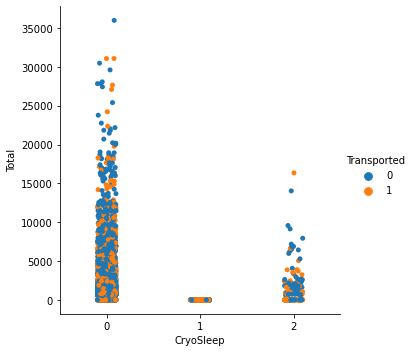

In [19]:
sns.catplot(x="CryoSleep", y="Total", data=train_data_cleaned, hue = "Transported")

In [20]:
for i in range(len(train_data_cleaned[float_nulls])):
    if any(train_data_cleaned[float_nulls].iloc[i] > 0) & (train_data_cleaned['CryoSleep'].iloc[i] == 2):
        train_data_cleaned.at[i,'CryoSleep'] = 0
    elif all(train_data_cleaned[float_nulls].iloc[i] == 0) & (train_data_cleaned['CryoSleep'].iloc[i] == 2):
        train_data_cleaned.at[i,'CryoSleep'] = 1

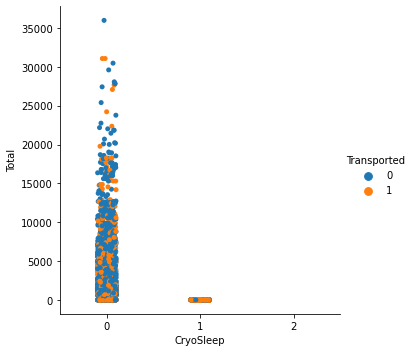

In [21]:
sns.catplot(x="CryoSleep", y="Total", data=train_data_cleaned, hue = "Transported")

In [22]:
index_num= train_data_cleaned[train_data_cleaned['CryoSleep'] == 2].index
train_data_cleaned = train_data_cleaned.drop(index_num)
train_data_cleaned

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total,Deck,Num,Side
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,1,0,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,5,0,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,0,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,0,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,0,98,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,6,1499,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,6,1500,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,4,608,1


In [23]:
float_nulls = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total']
train_data_cleaned[float_nulls] = train_data_cleaned[float_nulls].fillna(0)

In [24]:
train_data['Total'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']

In [25]:
train_data_cleaned.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Total             0
Deck              0
Num               0
Side              0
dtype: int64

In [26]:
#Create subset of data without ID, Name, or Transported columns
train_data_fit = train_data_cleaned.loc[:, ~train_data_cleaned.columns.isin(['PassengerId', 'Name','Transported'])]

## Create and test models

#### Setup and scale data for models

In [27]:
#Create variables for models and cross_validation variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
X = scaler.fit_transform(train_data_fit)
y = train_data_cleaned['Transported']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

#### Random Forest

In [28]:
#See which max_depth is best for random forest
accuracy_list = []

for i in range(10,15):
    rf = RandomForestClassifier(max_depth=i, random_state=10)
    rf.fit(X_train, y_train)
    rf_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    avg_score = mean(rf_scores)
    accuracy_list.append(avg_score)
    print('Max Depth %d Accuracy: %.3f (%.3f)' % (i,mean(rf_scores), std(rf_scores)))

Max Depth 10 Accuracy: 0.801 (0.016)
Max Depth 11 Accuracy: 0.801 (0.015)
Max Depth 12 Accuracy: 0.801 (0.016)
Max Depth 13 Accuracy: 0.801 (0.018)
Max Depth 14 Accuracy: 0.803 (0.017)


In [29]:
rf = RandomForestClassifier(max_depth=10, random_state=10)
rf.fit(X_train, y_train)

rf_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))

Accuracy: 0.801 (0.016)


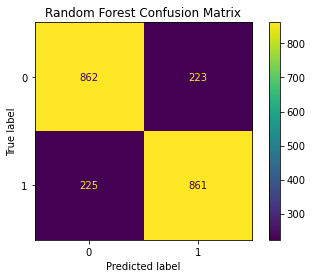

In [30]:
y_pred = cross_val_predict(rf, X_test, y_test, cv=10)

rf_cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
           display_labels=rf.classes_)

disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [31]:
rf_feature_importances = pd.DataFrame(rf.feature_importances_, index =train_data_fit.columns,  columns=['importance']).sort_values('importance', ascending=False)
rf_feature_importances

,importance
CryoSleep,0.137444
Total,0.134879
Spa,0.105936
RoomService,0.096128
FoodCourt,0.093572
VRDeck,0.087812
Num,0.073755
ShoppingMall,0.071384
Age,0.057405
Deck,0.053430


#### Category Boosted

In [32]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
clf.score(X_train,y_train)

0.8413454154507756

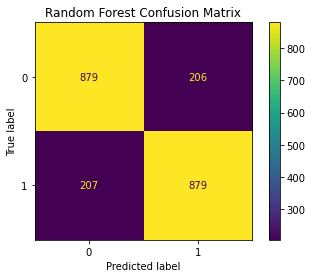

In [34]:
clf_pred = clf.predict(X_test)
cat_cm = confusion_matrix(y_test, clf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cat_cm)

disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [35]:
from catboost import Pool
train_pool = Pool(X_train, y_train)
clf.get_feature_importance(train_pool)

data = pd.DataFrame({'feature_importance': clf.get_feature_importance(train_pool), 
              'feature_names': train_data_fit.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)
data

,feature_importance,feature_names
8,13.258939,Spa
12,12.668499,Num
0,11.510215,HomePlanet
9,11.152961,VRDeck
11,10.052025,Deck
5,9.614617,RoomService
13,6.537435,Side
1,6.136792,CryoSleep
6,6.129497,FoodCourt
10,3.784392,Total


In [36]:
rf_feature_importances = pd.DataFrame(rf.feature_importances_,
                                      index =train_data_fit.columns, 
                                      columns=['importance']).sort_values('importance', ascending=False)
rf_feature_importances

,importance
CryoSleep,0.137444
Total,0.134879
Spa,0.105936
RoomService,0.096128
FoodCourt,0.093572
VRDeck,0.087812
Num,0.073755
ShoppingMall,0.071384
Age,0.057405
Deck,0.053430


### Log Regression

In [37]:
log_reg = LogisticRegression(random_state=0, max_iter = 10000).fit(X, y)
log_scores = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(log_scores), std(log_scores)))

Accuracy: 0.790 (0.013)


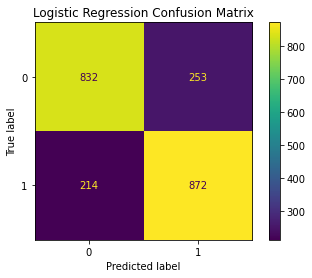

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_pred = log_reg.predict(X_test)
log_cm = confusion_matrix(y_test, log_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
           display_labels=rf.classes_)

disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [39]:
boosted = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
max_depth=2, random_state=0).fit(X_train, y_train)
boosted_scores = cross_val_score(boosted, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(boosted_scores), std(boosted_scores)))

Accuracy: 0.787 (0.016)


In [40]:
boosted_feature_importances = pd.DataFrame(boosted.feature_importances_, index =train_data_fit.columns,  columns=['importance']).sort_values('importance', ascending=False)
boosted_feature_importances

,importance
CryoSleep,0.359700
Spa,0.107225
Num,0.083310
VRDeck,0.077065
FoodCourt,0.071200
RoomService,0.069267
HomePlanet,0.056001
ShoppingMall,0.040480
Deck,0.037662
Total,0.032401


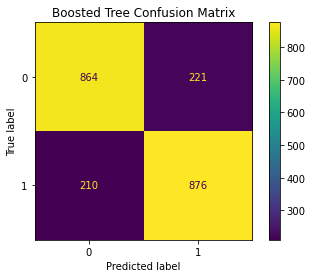

In [41]:
boosted_pred = boosted.predict(X_test)

boosted_cm = confusion_matrix(y_test, boosted_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=boosted_cm,
           display_labels=rf.classes_)

disp.plot()
plt.title('Boosted Tree Confusion Matrix')
plt.show()

In [42]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
svm_scores = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(svm_scores), std(svm_scores)))

Accuracy: 0.800 (0.015)


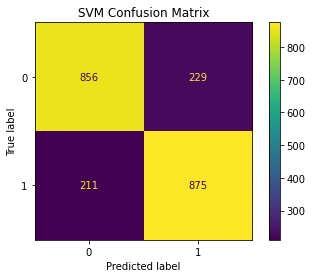

In [43]:
svm_pred = svm.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm,
           display_labels=rf.classes_)

disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()

In [44]:
svc = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3))
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(svc_scores), std(svc_scores)))


Accuracy: 0.784 (0.018)


In [45]:
models = ['Random Forest','Log Regression','Boosted','SVM',"SVM Poly"]
accuracy_scores = [mean(rf_scores), mean(log_scores), mean(boosted_scores), mean(svm_scores),mean(svc_scores)]
accuracy_std = [std(rf_scores), std(log_scores), std(boosted_scores), std(svm_scores), std(svc_scores)]
accuracy_df = pd.DataFrame()
accuracy_df['Accuracy'] = accuracy_scores
accuracy_df['Std Dev'] = accuracy_std
accuracy_df.index = models

In [46]:
accuracy_df

,Accuracy,Std Dev
Random Forest,0.801155,0.016228
Log Regression,0.790250,0.013408
Boosted,0.786666,0.016033
SVM,0.800029,0.015143
SVM Poly,0.784260,0.017668


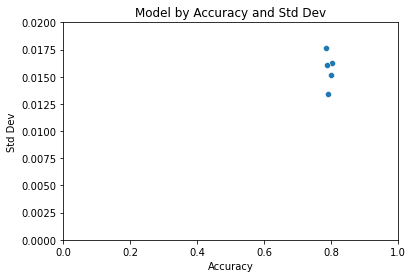

In [47]:
sns.scatterplot(data = accuracy_df, x = 'Accuracy', y = 'Std Dev')
plt.xlim([0,1])
plt.ylim([0,.02])
plt.title('Model by Accuracy and Std Dev')
plt.show()

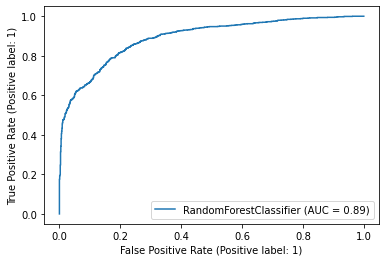

In [48]:
from sklearn import model_selection 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
rf.fit(X_train, y_train)
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

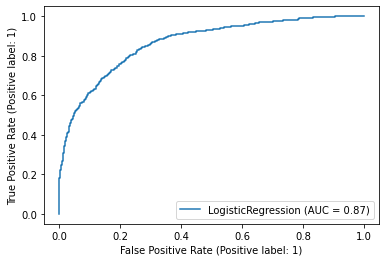

In [49]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
log_reg.fit(X_train, y_train)
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

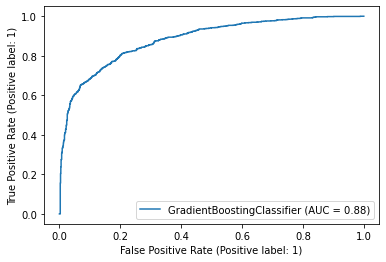

In [50]:
from sklearn.metrics import RocCurveDisplay
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
boosted.fit(X_train, y_train)
RocCurveDisplay.from_estimator(boosted, X_test, y_test)
plt.show()

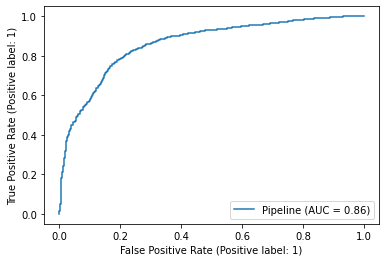

In [51]:
from sklearn.metrics import RocCurveDisplay
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
svc.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

In [52]:
train_data_fit

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,0,98,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1499,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,6,1500,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,4,608,1


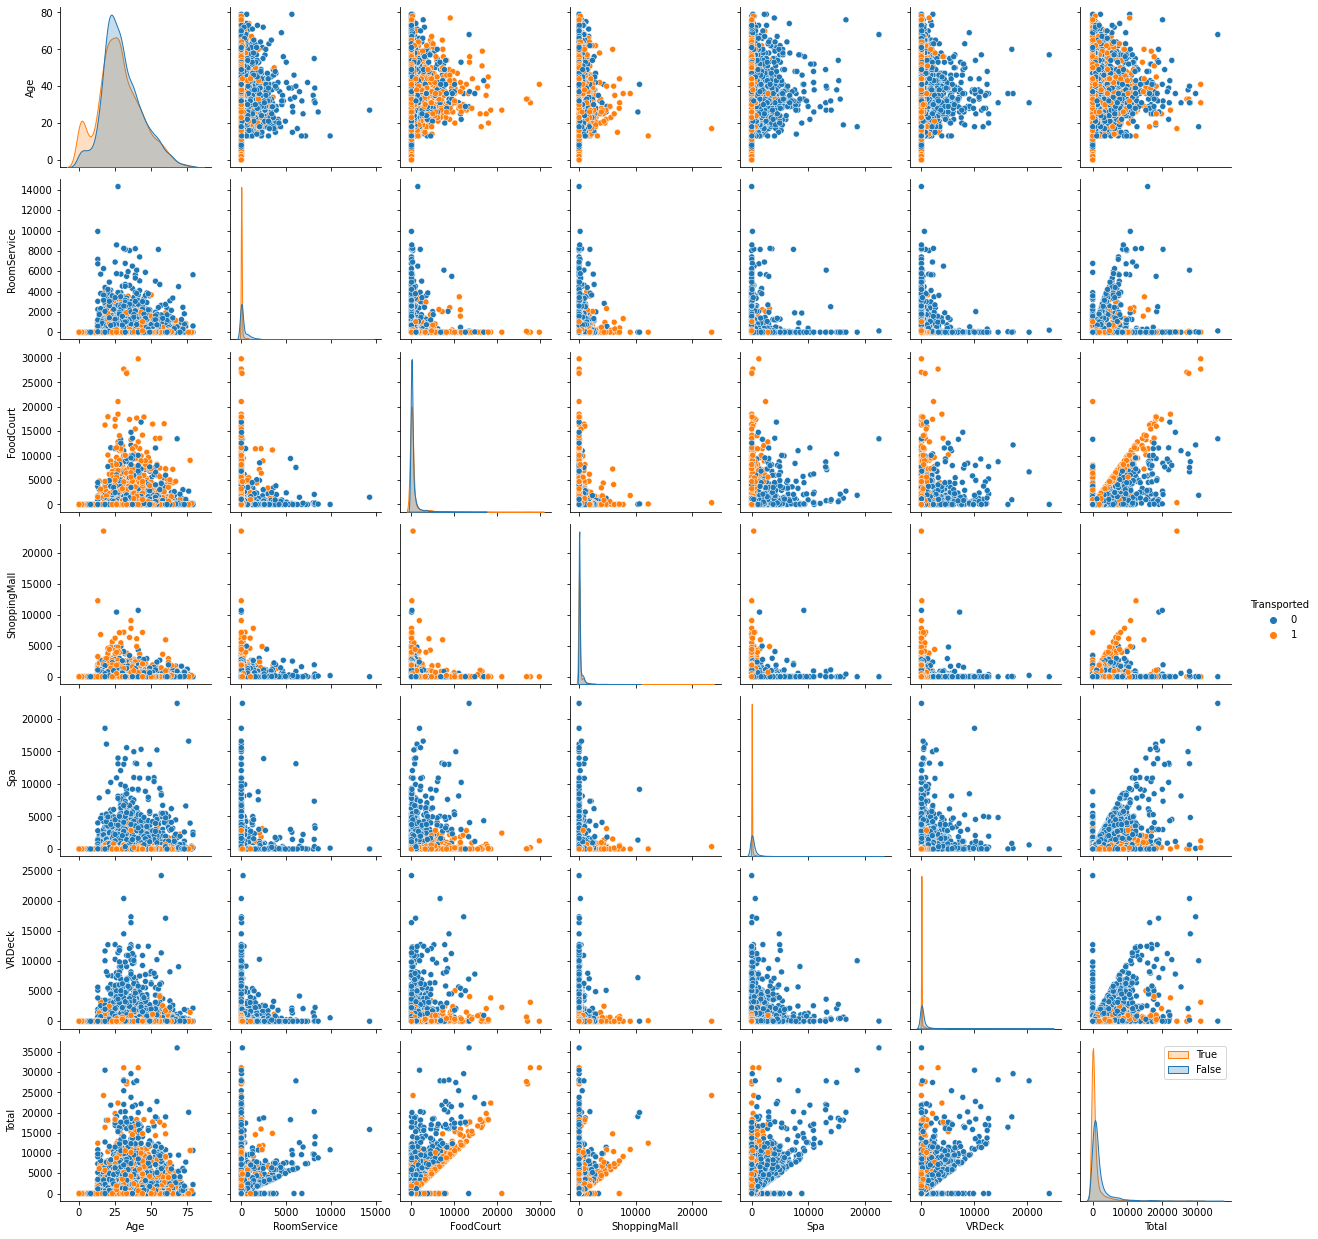

In [53]:
sns.pairplot(train_data_cleaned, hue="Transported", height=2.5)
plt.legend(labels=["True","False"])
plt.show()

In [54]:
#import pycaret as pyc

#s = pyc.setup(data=train_data_fit,
 #         session_id=7010,
  #        target='Transported',
   #       train_size=0.99,
    #      fold_strategy='stratifiedkfold',
     #     fold=10,
      #    fold_shuffle=True,
       #   silent=True,
        #  ignore_low_variance=True,
         # remove_multicollinearity = True,
          #normalize = True,
          #normalize_method = 'robust',)

In [55]:
from pycaret.classification import *
import scikitplot
s = setup(data=train_data_cleaned,
          session_id=7010,
          target='Transported',
          train_size=0.99,
          fold_strategy='stratifiedkfold',
          fold=5,
          fold_shuffle=True,
          silent=True,
          ignore_low_variance=True,
          remove_multicollinearity = True,
          normalize = True,
          normalize_method = 'robust')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:55:26
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


MemoryError: Unable to allocate 3.69 GiB for an array with shape (5, 99111980) and data type float64